# Part I - Ford GoBike Data Exploration
## by Oluwaseyitan Agbaje

## Introduction
> This document explores the dataset containing information about 183,412 individual rides made in a bike-sharing system covering the greater San Francisco Bay area in the month of February 2019. Each ride data consists of up to 16 variables including the ride characteristics (duration of ride, start and end bike stations), the rider's demographic (gender and birth year) and the rider's characteristic (user type and enrollment in bike share for all initiative)

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

In [2]:
rides = pd.read_csv('201902-fordgobike-tripdata.csv')
rides.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
rides.shape

(183412, 16)

In [5]:
rides.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
rides.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [7]:
rides.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


I identified some issues to be cleaned:
1. Incorrect Data type
    
    Cleaning action:
    a. Float to String (`start_station_id`, `end_station_id`, `bike_id`)
    b. String to Date Time (`start_time`, `end_time`)
    c. Float to Integer (`member_birth_year`)
    
2. Null values in `	start_station_id`,`start_station_name`, `member_birth_year`, `member_gender` columns.
    
    Cleaning action: Drop rows with null values

### Preliminary Cleaning

In [8]:
rides_clean =rides.copy()

#### Issue #1:  Null values in `	start_station_id`,`start_station_name`, `member_birth_year`, `member_gender` columns. 

##### Define
Drop rows with null values

##### Code

In [9]:
rides_clean.dropna(inplace = True)

In [10]:
rides_clean = rides_clean.reset_index(drop = True)

##### Test

In [11]:
rides_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

#### Issue #2:  Incorrect data types in table

##### Define
Convert:
    a. Float to String (`start_station_id`, `end_station_id`) 
    b. Integer to String (`bike_id`)
    b. String to Date Time (`start_time`, `end_time`)
    c. Float to Integer (`member_birth_year`)

##### Code

In [12]:
str_variables =['start_station_id', 'end_station_id']
dt_variables = ['start_time', 'end_time']
int_variables = ['member_birth_year']

In [13]:
#float to strings
for var in str_variables:
    rides_clean[var] = rides_clean[var].astype(str).str[:-2]

In [14]:
#str to datetime
for var in dt_variables:
    rides_clean[var] = pd.to_datetime(rides_clean[var])
    rides[var] = pd.to_datetime(rides_clean[var])

In [15]:
#int to str
rides_clean['bike_id'] = rides_clean['bike_id'].astype(str)

#float to int
rides_clean['member_birth_year'] = rides_clean['member_birth_year'].astype(int)

##### Test

In [16]:
variables = ['start_station_id', 'end_station_id','start_time', 'end_time', 'member_birth_year', 'bike_id']
for var in variables:
    x = str(type(rides_clean[var][0]))
    print(var +' is a ' + x)

start_station_id is a <class 'str'>
end_station_id is a <class 'str'>
start_time is a <class 'pandas._libs.tslibs.timestamps.Timestamp'>
end_time is a <class 'pandas._libs.tslibs.timestamps.Timestamp'>
member_birth_year is a <class 'numpy.int32'>
bike_id is a <class 'str'>


In [17]:
rides_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


In [18]:
rides1 = rides_clean.copy()
rides1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


In [19]:
rides1.start_time.min(), rides1.start_time.max()

(Timestamp('2019-02-01 00:00:20.636000'),
 Timestamp('2019-02-28 23:59:18.548000'))

In [20]:
#save file to csv
rides1.to_csv('201902_fordgobike_tripdata_clean.csv', index = False)

### What is the structure of your dataset?

> There are a total of 183,412 bike rides recorded in the dataset and 174,952 after cleaning. Each ride records 16 variables; 8 quantitative variable (`duration_secs`, `member_birth_year`, `start_time`, `end_time`, `start_station_latitude`, `start_station_longitude`, `end_station_latitude`, `end_station_longitude` ) and 8 qualitative variables (`start_station_id`, `start_station_name`,	`end_station_id`, `end_station_name`, `bike_id`, `user_type`, `member_gender`, `bike_share_for_all_trip`). 


### What is/are the main feature(s) of interest in your dataset?

> I am interested in couple of insights from the dataset ranging from the demographic of the riders, the effect of time of day and day of the week on the number of bike rides, the rider's characteristics(Gender, user type and enrollment in Bike Share for all). Lastly, how the length of a ride is affected by rider's characterisitics.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I am going to explore all the variables to understand their effects (except longitudes and latitudes variables) on the bike rides. I am expecting the bike rides will be popular during morning and evening, typically when people go to work and go home on weekdays.

## Univariate Exploration

###  Are young people more likely to ride the bikes?

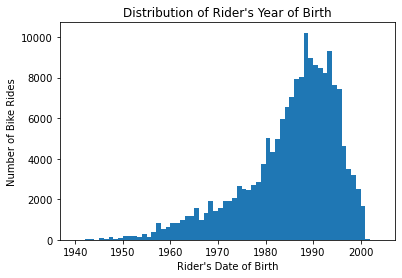

In [21]:
#Histogram distribution to dipict bike ride vs the year of birth
bins =np.arange(1940, 2000+5, 1)
plt.hist(data =rides1, x = 'member_birth_year', bins = bins)
plt.title("Distribution of Rider's Year of Birth")
plt.ylabel('Number of Bike Rides')
plt.xlabel("Rider's Date of Birth");

The distribution of the member date of birth is skewed to the left indicating that majority of riders are young. The distribution showed that majority of the data fell between 1980 and 2000 bins indicating majority of the riders are aged 18 - 39 years(as at 2019). It was observed that some outliers before 1940 indicating riders older than 78/79 years as at 2019. This may be possible but may be due to an error in the data input. Will explore a log plot to identify the better identify the counts that fall below 1940.

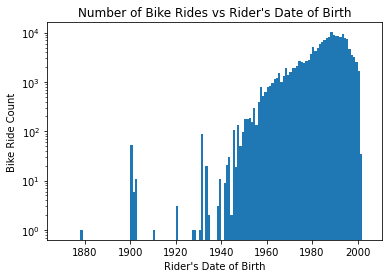

In [22]:
#Plotting the distribution using a log scale on the y-axis or the number of bike rides
bins =np.arange(1870, 2000+5, 1)
plt.hist(data =rides1, x = 'member_birth_year', bins = bins)
plt.yscale('log')
plt.title("Number of Bike Rides vs Rider's Date of Birth")
plt.ylabel('Bike Ride Count')
plt.xlabel("Rider's Date of Birth");

The bike ride counts fall below 100 for each bins below the year 1940, showing the data is inconsequential to the whole data dataset. However, there is one count at 1880 which is impossible and likely an error due to data input, possibly the rider was born in 1980

### What is the typical bike ride duration? 

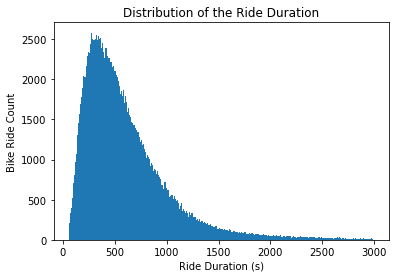

In [23]:
bins =np.arange(60, 3000, 10)
plt.hist(data =rides1, x = 'duration_sec', bins = bins)
plt.title('Distribution of the Ride Duration')
plt.xlabel('Ride Duration (s)')
plt.ylabel('Bike Ride Count');

In [24]:
rides1.query('duration_sec>30000').duration_sec.count()

125

In [25]:
rides1.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

The distribution of the of the bike ride duration is unimodal and is skewed to the right, with mode around 300s to 400s (~5-6 mins). Indicating many of the bike rides are short and within short distances. However, bike rides can last up to 3000s (50mins) and a maximum of about 84,500s (23 hours) an outlier. The very long ride duration can suggest that rider may not necesary be riding the bike through the duration recorded but is possessing the bike for a long period.

The average ride duration falls between 300s  and 790s (~ 5 to 13 mins)

Will like to explore the effect on various variables such as time of the day, gender, age and user type on the ride duration. Will any of the varibles have an effect on the ride duration?

### What are the user characteristics of each bike rides? 

This section explores the different characterisitics of the users riding the bikes. 
1. What gender make use of the bikes more?
2. Are subcribers of the Ford's GoBike likely use the bikes more than customers? (Pays a Subscription)
3. How many rides are attributed to Bike Share For All? (An initiative for low income earners)

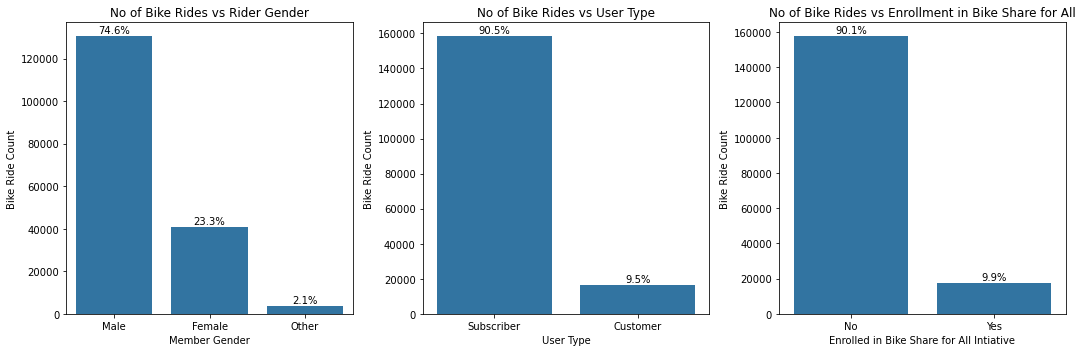

In [26]:
#https://www.folkstalk.com/tech/how-to-add-percentage-in-countplot-with-code-examples/
total = float(len(rides1))
plt.figure(figsize= [15, 5])


plt.subplot(1,3,1)
ax1 = sb.countplot(data = rides1, x = 'member_gender', 
             color = sb.color_palette()[0], 
             order = rides1['member_gender'].value_counts().index)
plt.title('No of Bike Rides vs Rider Gender')
plt.ylabel('Bike Ride Count')
plt.xlabel('Member Gender')
for p in ax1.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax1.annotate(percentage, (x, y), ha='center', va='center')

plt.subplot(1,3,2)
ax2 = sb.countplot(data = rides1, x = 'user_type', 
             color = sb.color_palette()[0], 
             order = rides1['user_type'].value_counts().index)
plt.title('No of Bike Rides vs User Type')
plt.ylabel('Bike Ride Count')
plt.xlabel('User Type')
for p in ax2.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax2.annotate(percentage, (x, y), ha='center', va='center')

plt.subplot(1,3,3)
ax3 = sb.countplot(data = rides1, x = 'bike_share_for_all_trip', 
             color = sb.color_palette()[0], 
             order = rides1['bike_share_for_all_trip'].value_counts().index)
plt.title('No of Bike Rides vs Enrollment in Bike Share for All')
plt.ylabel('Bike Ride Count')
plt.xlabel('Enrolled in Bike Share for All Intiative')
for p in ax3.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax3.annotate(percentage, (x, y), ha='center', va='center')

plt.tight_layout()
plt.show();


Based on the above visualisation, it was identified that majority of the bike rides were by taken by men (74.6%), by subscribers (90.5%) and non-enrollees in the bike shares for all initiative (90.1%).

Will love to understand how each of these rider characteristics relate with one another.

### How does bike ride count vary by hour of day, day of the week and week of the month?

The bike sharing dataset covers the rides taken in the month of February 2019, which has 28 days. Will be exploring how the bike count changes based on different time dimensions: hour of day, day of the week and the weeks in the month

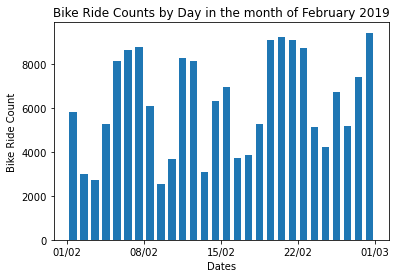

In [27]:
#Exploring the relationship between the bike ride count and the days within the month of February
plt.hist(data = rides1, x = 'start_time', bins = 28, rwidth =0.7) #A bin to capture the rides within one day
labels =['2019-02-01','2019-02-08','2019-02-15','2019-02-22','2019-03-01']
form = ['01/02','08/02','15/02','22/02','01/03']
plt.xticks(labels, form)
plt.title('Bike Ride Counts by Day in the month of February 2019')
plt.ylabel('Bike Ride Count')
plt.xlabel('Dates');

Based on the bike ride count distribution by day in the month of February, there is an observed pattern based on the day of the week. Bearing in mind that the first day in February 2019 is a Friday, is is observed that Thursday has highest number of bike rides for each week while the lowest number of bike rides occur mainly during the weekend. There is a perceived increase in the number of bike rides on a weekly basis during month and this will be investigated further in the next visualisation.

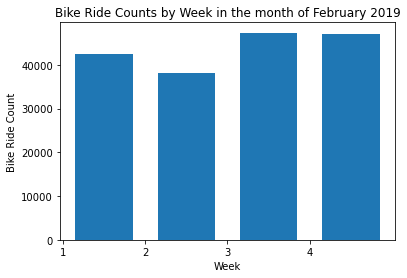

In [28]:
#Trying to see bike rides distribution by week
plt.hist(data = rides1, x = 'start_time', bins = 4, rwidth = 0.7)
labels =['2019-02-01','2019-02-08','2019-02-15','2019-02-22']
form = ['1','2','3','4']
plt.xticks(labels, form)
plt.title('Bike Ride Counts by Week in the month of February 2019')
plt.ylabel('Bike Ride Count')
plt.xlabel('Week');

This distribution above shows that the number of  bike rides on a weekly basis decreased in week 2, increased in week 3 and more or less remained same in week 4. 

In [29]:
#https://stackoverflow.com/questions/51586114/how-can-i-extract-day-of-week-from-timestamp-in-pandas
#extract the day of the week and hour of the day from the timestamp start_time
rides1['day_of_week'] = rides1.start_time.dt.day_name()
rides1['hour_of_day'] = rides1.start_time.dt.hour
rides1.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_week,hour_of_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thursday,17


In [30]:
day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow = pd.api.types.CategoricalDtype(ordered =True, categories = day_of_week_order)
rides1['day_of_week'] = rides1['day_of_week'].astype(dow)

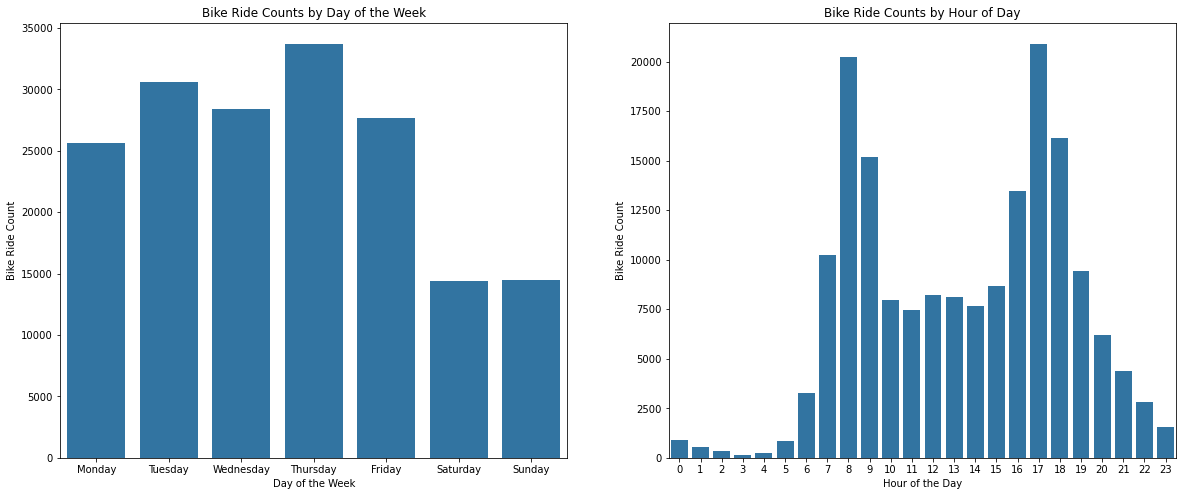

In [31]:
plt.figure(figsize=[20,8])

base_color = sb.color_palette()[0]
plt.subplot(1,2,1)
sb.countplot(data = rides1, x = 'day_of_week', color = base_color)
plt.title('Bike Ride Counts by Day of the Week')
plt.ylabel('Bike Ride Count')
plt.xlabel('Day of the Week')

plt.subplot(1,2,2)
sb.countplot(data = rides1, x = 'hour_of_day', color = base_color)
plt.title('Bike Ride Counts by Hour of Day')
plt.ylabel('Bike Ride Count')
plt.xlabel('Hour of the Day');


The distribution of the bike ride counts accross the day of the week confirms the intial observation made for Thursday being a popular day of the week to rent bikes as well as Saturday and Sunday being the least popular day of the week to rent bikes. The top 3 popular days to rent bikes were in the mid-week i.e. Thursdays, Tuesday and Wednesdays.

The busiest times to rent bikes were between 7a.m.-9a.m. and 4p.m.-6p.m. which corresponds to peak times when people typically leave for and leave work respectively. Weekends will likely follow a different trend and will be investigated further in the course of this analysis

## Bivariate Exploration

> In this section, I will be invesigating the relationship with various pairs of variables and as identified in the previous section,

### Is there a correlation between the bike ride duration and the rider's birth year?

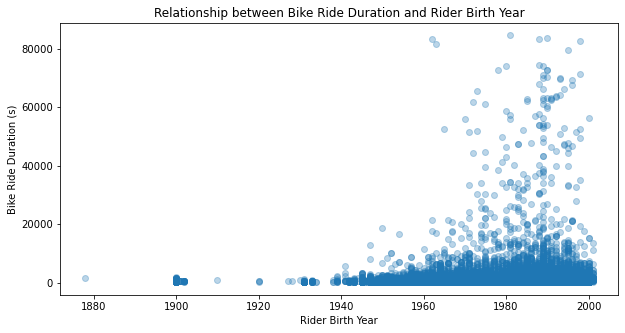

In [32]:
#plotting a scatterplot 
plt.figure(figsize=[10,5])

sb.regplot(data = rides1, x = 'member_birth_year', y = 'duration_sec', scatter_kws={'alpha':0.3}, fit_reg= False)
plt.title('Relationship between Bike Ride Duration and Rider Birth Year')
plt.ylabel('Bike Ride Duration (s)')
plt.xlabel('Rider Birth Year');

In [33]:
#Calculating the correlation between duration_sec and member_birth_year
rides1['duration_sec'].corr(rides1['member_birth_year'])

-0.006041174875254665

Based on visual assessment and calculation, we can see there is no correlation between how old the rider is and bike ride duration. This makes sense as there other factors, for example, distance that will affect the duration of a bike ride.

However, it is noticeable that younger riders took the longest rides lasting up to ~ 80,000s (~22hour). Again, this may be attributed to the rider possessing the bike rented for a long period and not actually riding it.

### How does the bike ride count vary with the rider's birth year and gender?

In [34]:
gender = ['Male', 'Female', 'Other']
gdr = pd.api.types.CategoricalDtype(ordered =True, categories = gender)
rides1['member_gender'] = rides1['member_gender'].astype(gdr)

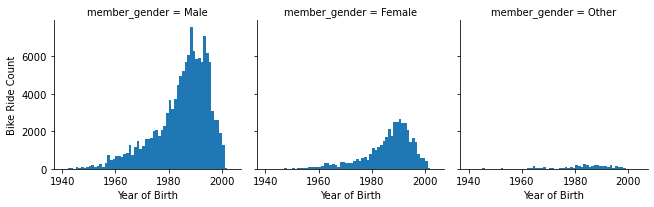

In [35]:
bins =np.arange(1940, 2000+5, 1)

g = sb.FacetGrid(data = rides1, col = 'member_gender', col_wrap = 3, height = 3)
g.map(plt.hist, 'member_birth_year', color = base_color, bins = bins)
#g.set_xticklabels(rotation = 90)
g.set_xlabels('Year of Birth')
g.set_ylabels('Bike Ride Count')
plt.show()

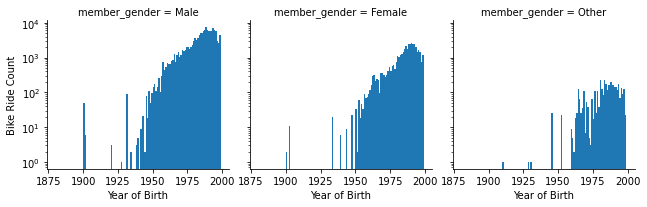

In [36]:
bins =np.arange(1880, 2000, 1)

g = sb.FacetGrid(data = rides1, col = 'member_gender', col_wrap = 3, height = 3)
g.map(plt.hist, 'member_birth_year', color = base_color, bins = bins).set(yscale = 'log')
#g.set_xticklabels(rotation = 90)
g.set_xlabels('Year of Birth')
g.set_ylabels('Bike Ride Count');


The male distribution follows the same pattern as the general duration, is unimodal and left skewed. The female distribution is also unimodal and left skewed, however, height of the distribution is much lower due to the lower number of rides attributed to  females. Rides attributed to other genders has no observable pattern due to the low data size for the subset.

Using the log transformation on the y axis, we are able identify the oldest riders(excluding the outliers) for each gender. The oldest rider for the male gender was born in the 1940s while for the female gender was in the 1950s and for other genders the oldest was born in ~1960s.

In [37]:
#ordering the user_type and bike_share_for_all_trip to allow easy ordering in plots
us_type = ['Subscriber', 'Customer']
ust = pd.api.types.CategoricalDtype(ordered =True, categories = us_type)
rides1['user_type'] = rides1['user_type'].astype(ust)

bf_all = ['No', 'Yes']
bfa = pd.api.types.CategoricalDtype(ordered =True, categories = bf_all)
rides1['bike_share_for_all_trip'] = rides1['bike_share_for_all_trip'].astype(bfa)

### How does the bike ride duration vary with the various rider characteristics?

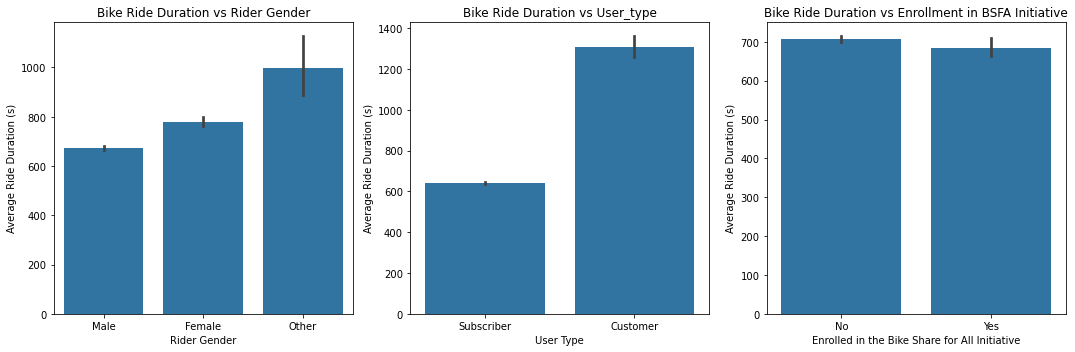

In [38]:
#average trip time per category
plt.figure(figsize=[15,5])

#by gender
gender = ['Male', 'Female', 'Other']
plt.subplot(1,3,1)
ax1 = sb.barplot(data = rides1, x = 'member_gender', y = 'duration_sec', color = base_color)
#ax1.set_box_aspect(10/len(ax.patches))
plt.title('Bike Ride Duration vs Rider Gender')
plt.ylabel('Average Ride Duration (s)')
plt.xlabel('Rider Gender')

#by user type
sc = ['Subscriber', 'Customer']
plt.subplot(1,3,2)
ax2 = sb.barplot(data = rides1, x = 'user_type', y = 'duration_sec', color = base_color)
#ax2.set_box_aspect(10/len(ax.patches))
plt.title('Bike Ride Duration vs User_type')
plt.ylabel('Average Ride Duration (s)')
plt.xlabel('User Type')

#by bike share for all or full paying customer
plt.subplot(1,3,3)
ax3 = sb.barplot(data = rides1, x = 'bike_share_for_all_trip', y = 'duration_sec', color = base_color)
#ax3.set_box_aspect(30/len(ax.patches))
plt.title('Bike Ride Duration vs Enrollment in BSFA Initiative')
plt.ylabel('Average Ride Duration (s)')
plt.xlabel('Enrolled in the Bike Share for All Initiative')
plt.tight_layout();

Based on the above plots men are likely to take shortest rides, women are likely to take shorter rides and other genders the longest rides in terms of duration of the rides.

Subcribers have shorter rides compared to customers. This may attributed many factors such as improvement due to habits of riding regularly and possibility shorter possession of the bikes.

Whether the riders were enrolled on the Bike Share for All initiaitve or not had no effect on the average ride durations as the confidence interval overlaps in both scenarios.

### How does the popularity of bike rides vary with the time of day and the day of the week?

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


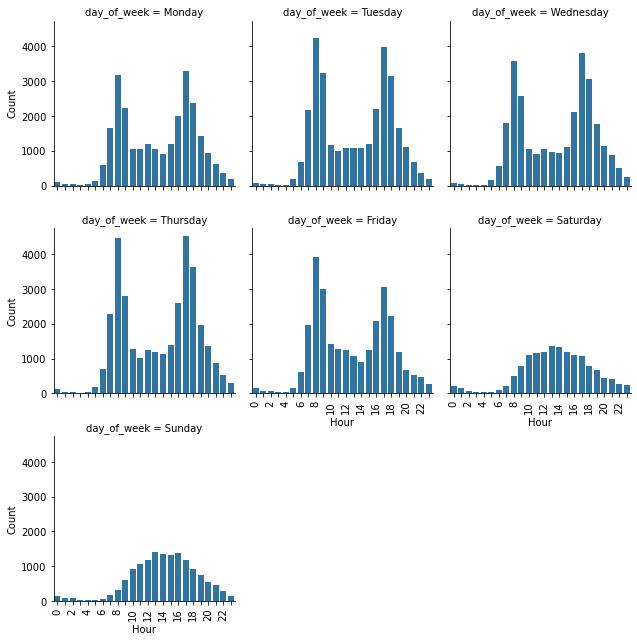

In [39]:
#https://stackoverflow.com/questions/43727278/how-to-set-readable-xticks-in-seaborns-facetgrid
g = sb.FacetGrid(data = rides1, col = 'day_of_week', col_wrap = 3, height = 3)
g.map(sb.countplot, 'hour_of_day', color = base_color)
g.set_xticklabels(rotation = 90)
g.set_xlabels('Hour')
g.set_ylabels('Count')

for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%2 != 0): labels[i] = '' 
    ax.set_xticklabels(labels) # set new labels
plt.show();

The distribution of the popularity of the bike rides by hour for the days of the week that fall on a weekday follow the same pattern as the general distribution plotted earlier. In these distributions, there are 2 peaks at the 2 peak times identified in the general plot.

However, the popularity of bike rides by hour during the weekend (Saturday and Sunday), is different. The distribution shows an increase in bike rides from about 6 a.m., peaking between 1p.m. - 4p.m. after which the number of rides decreases after 4p.m.. This indicates that busiest time on weekends for bike rides are in afternoon between 1p.m. and 4 p.m.

### How does the bike ride duration vary by hour of the day and day of the week?

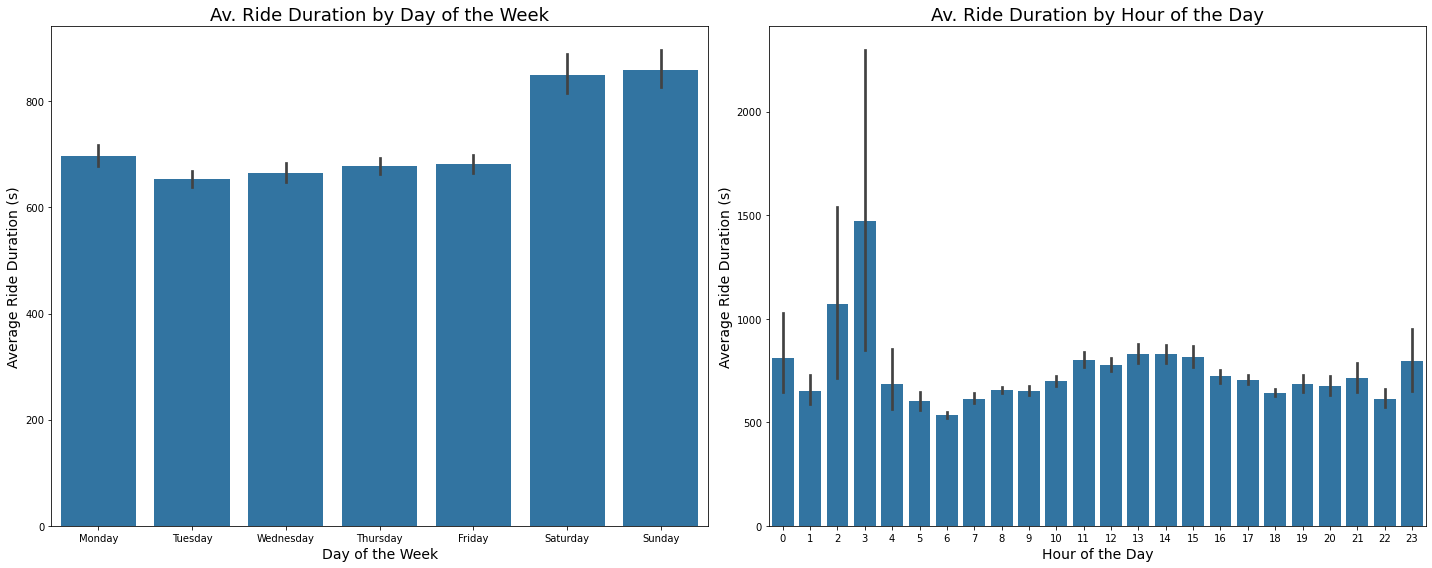

In [40]:
plt.figure(figsize=[20,8])
#by day of the week
plt.subplot(1,2,1)
ax1 = sb.barplot(data = rides1, x = 'day_of_week', y = 'duration_sec', color = base_color)
plt.title('Av. Ride Duration by Day of the Week', fontsize = 18)
plt.ylabel('Average Ride Duration (s)', fontsize= 14)
plt.xlabel('Day of the Week', fontsize = 14)

#by hour of the day
plt.subplot(1,2,2)
ax1 = sb.barplot(data = rides1, x = 'hour_of_day', y = 'duration_sec', color = base_color)
plt.title('Av. Ride Duration by Hour of the Day', fontsize = 18)
plt.ylabel('Average Ride Duration (s)', fontsize = 14)
plt.xlabel('Hour of the Day', fontsize = 14)
plt.tight_layout()
plt.show()

The variation in average bike ride duration is more/less the same during weekdays, while the it is higher in weekends as seen above. Possible due to varied amount of factors, one being that people are more likely to hurry during the weekdays than weekends.

If we exclude the confidence interval/error bars, we see that the average bike ride is longer during off peak periods e.g. at 2-3 a.m. and 11 a.m - 2p.m.. Taking the error bars into consideration the ride durations are more or less the same.

### What are the most popular bike stations in San Francisco?

There are 329 bike stations in San Francisco. Will be interested in knowing the top 10 most popular start and end stations

In [41]:
rides1.start_station_name.nunique()

329

In [42]:
#Filtering for the most popular bike start and end stations
tt_start_s = rides1.start_station_name.value_counts(ascending= False)[:10].reset_index(name = "count")

tt_end_s = rides1.end_station_name.value_counts(ascending= False)[:10].reset_index(name = "count")

tt_end_s.head(1)

,index,count
0,San Francisco Caltrain Station 2 (Townsend St...,4624


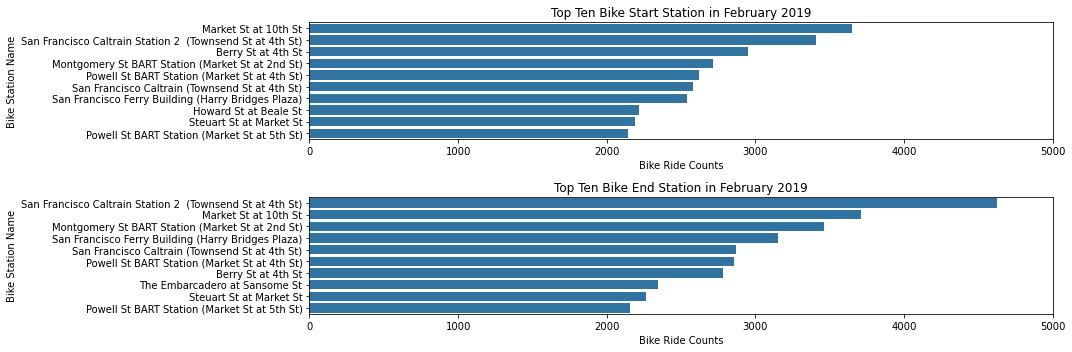

In [43]:
#Viewing the top 10 start and end stations
plt.figure(figsize=[15,5])

plt.subplot(2,1,1)
sb.barplot(data = tt_start_s, x= 'count', y ='index', color =base_color)
plt.xlim([0, 5000])
plt.title('Top Ten Bike Start Station in February 2019')
plt.ylabel('Bike Station Name')
plt.xlabel('Bike Ride Counts')

plt.subplot(2,1,2)
sb.barplot(data = tt_end_s, x= 'count', y ='index', color =base_color)
plt.xlim([0, 5000])
plt.title('Top Ten Bike End Station in February 2019')
plt.ylabel('Bike Station Name')
plt.xlabel('Bike Ride Counts')

plt.tight_layout();

Above are the top 10 most utilised stations to start and end a bike ride. The stations falling into the 10 most frequented stations are same for both situations except for Howard St at Beale St featuring as a popular start station and not a popular end station as well as The Embarcadero at Sansome St as a popular end station list and not a popular start station.

The most popular start station is Market St at 10th St  while the most popular end station is at San Francisco Caltrain Station 2. San Francisco Caltrain Station 2 is the most popular station in the 2 categories, implying it is most popular for riders to ride to the San Francisco Train Station.

## Multivariate Exploration

> In this section, I am trying to explore how the age/year of birth of the riders relates with the gender, user type and enrollment in the bike share for all initiatives with regards to the number of bike rides. I will also explore the effect of gender on the enrollment in the bikeshare for all initiative and the user type. I will be using a mixture of bivariate visualisation and multivariate portion of the analysis to aid easy analysis.

### What is the distribution of rides attributed to the year of birth and the user characterisitics?

In [44]:
#Creating a new column to group the year of birth(rider's birth year) into year intervals for analysis 
rides1['rby_interval'] = (10 * (rides1['member_birth_year']//10)).astype(str) + ' - ' + (10 * (rides1['member_birth_year']//10)+9).astype(str)
rides1.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_week,hour_of_day,rby_interval
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thursday,17,1980 - 1989


In [45]:
#filter for data to include years in 1940 and later
df_1940 = rides1.query('member_birth_year >= 1940')
df_1940.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,hour_of_day
count,174749.000000,174749.000000,174749.000000,174749.000000,174749.000000,174749.000000,174749.000000
mean,704.300563,37.771201,-122.351718,37.771397,-122.351294,1984.877665,13.456106
std,1643.075498,0.100445,0.117778,0.100349,0.117340,9.871342,4.735567
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1941.000000,0.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,9.000000
50%,511.000000,37.780787,-122.398279,37.781010,-122.397437,1987.000000,14.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.285633,1992.000000,17.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,23.000000


In [46]:
def count_df(dataframe, var1, var2):
    """ The purpose of this function is to create a dataframe which stores the count based on 2 variables groupings"""
    tot_count = dataframe.groupby([var1, var2]).count().iloc[:,0].reset_index(name = "count")
    return tot_count

def prop_df(dataframe, var1, var2):
    """ The purpose of this function is to create a dataframe which stores the proportions based on 2 variables counts"""
    tot_count = dataframe.groupby([var1]).count().iloc[:,0]
    tot_group = dataframe.groupby([var1, var2]).count().iloc[:,0]
    prop_group = tot_group/tot_count
    prop_group = prop_group.reset_index(name ='count')
    return prop_group

In [47]:
#creating the dataframes for the group counts for year of birth and the user characteristics
byr_gender_count = count_df(df_1940, 'rby_interval', 'member_gender')
byr_usertype_count = count_df(df_1940, 'rby_interval', 'user_type')
byr_bsfa_count = count_df(df_1940, 'rby_interval', 'bike_share_for_all_trip')
print(byr_gender_count.head(1))
print(byr_usertype_count.head(1))
print(byr_bsfa_count.head(1))

  rby_interval member_gender  count
0  1940 - 1949          Male    414
  rby_interval   user_type  count
0  1940 - 1949  Subscriber    456
  rby_interval bike_share_for_all_trip  count
0  1940 - 1949                      No    302


In [48]:
#creating the dataframes for the group proportions for year of birth and the user characteristics
byr_gender_prop = prop_df(df_1940, 'rby_interval', 'member_gender')
byr_usertype_prop = prop_df(df_1940, 'rby_interval', 'user_type')
byr_bsfa_prop = prop_df(df_1940, 'rby_interval','bike_share_for_all_trip')
print(byr_gender_prop.head(1))
print(byr_usertype_prop.head(1))
print(byr_bsfa_prop.head(1))

  rby_interval member_gender     count
0  1940 - 1949          Male  0.878981
  rby_interval   user_type     count
0  1940 - 1949  Subscriber  0.968153
  rby_interval bike_share_for_all_trip     count
0  1940 - 1949                      No  0.641189


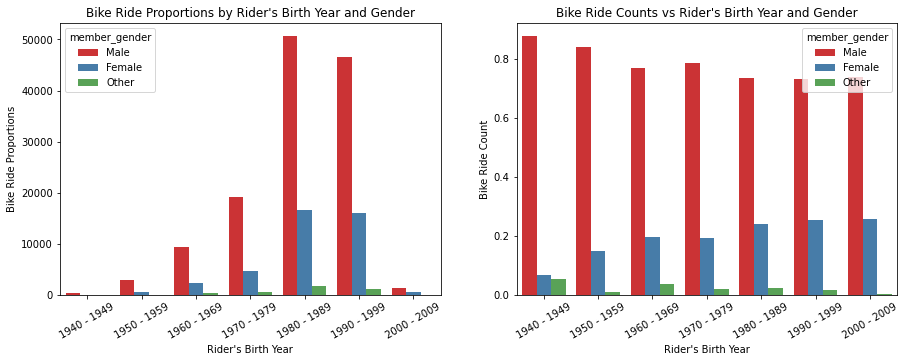

In [49]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,2)
sb.barplot(data = byr_gender_prop, x= 'rby_interval', y ='count', hue = 'member_gender', palette= 'Set1')
plt.title("Bike Ride Counts vs Rider's Birth Year and Gender")
plt.xlabel("Rider's Birth Year")
plt.ylabel("Bike Ride Count")
plt.xticks(rotation = 30)

plt.subplot(1,2,1)
sb.barplot(data = byr_gender_count, x= 'rby_interval', y ='count', hue = 'member_gender', palette= 'Set1')
plt.title("Bike Ride Proportions by Rider's Birth Year and Gender")
plt.xlabel("Rider's Birth Year")
plt.ylabel("Bike Ride Proportions")
plt.xticks(rotation = 30)

plt.show()

Majority of the bike rides fall within 1980s and 1990s as oberved earlier. The rides attributed to females increased with decade of the birth year. Implying younger women ride bikes more than the older generations. The other gender riders seem to decrease with decade with the exception of the 1950s



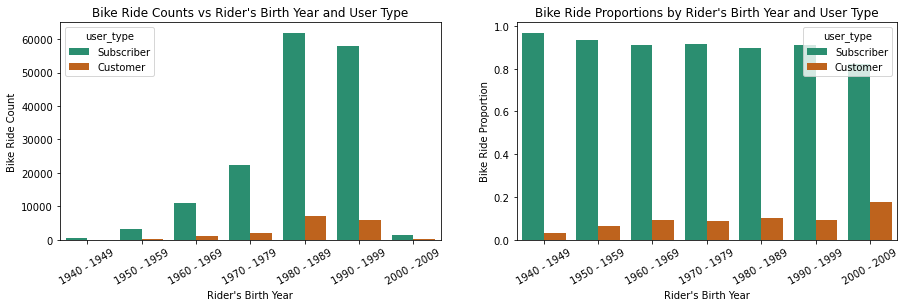

In [50]:
plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sb.barplot(data = byr_usertype_count, x= 'rby_interval', y ='count', hue = 'user_type', palette= 'Dark2')
plt.title("Bike Ride Counts vs Rider's Birth Year and User Type")
plt.xlabel("Rider's Birth Year")
plt.ylabel("Bike Ride Count")
plt.xticks(rotation = 30)


plt.subplot(1,2,2)
sb.barplot(data = byr_usertype_prop, x= 'rby_interval', y ='count', hue = 'user_type', palette= 'Dark2')
plt.title("Bike Ride Proportions by Rider's Birth Year and User Type")
plt.xlabel("Rider's Birth Year")
plt.ylabel("Bike Ride Proportion")
plt.xticks(rotation = 30)

plt.show()

THe older generation seem to subscribe more than the younger generation. There is a general decrease in proportion in bike ride counts with an increase in decade (or decrease in age)

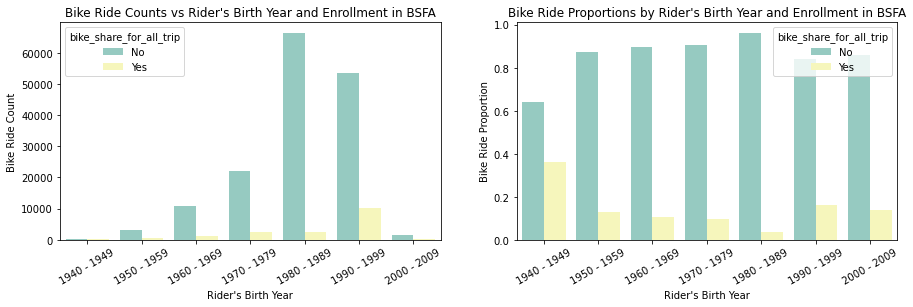

In [51]:
plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sb.barplot(data = byr_bsfa_count, x= 'rby_interval', y ='count', hue = 'bike_share_for_all_trip', palette= 'Set3')
plt.title("Bike Ride Counts vs Rider's Birth Year and Enrollment in BSFA")
plt.xlabel("Rider's Birth Year")
plt.ylabel("Bike Ride Count")
plt.xticks(rotation = 30)


plt.subplot(1,2,2)
sb.barplot(data = byr_bsfa_prop, x= 'rby_interval', y ='count', hue = 'bike_share_for_all_trip', palette= 'Set3')
plt.title("Bike Ride Proportions by Rider's Birth Year and Enrollment in BSFA")
plt.xlabel("Rider's Birth Year")
plt.ylabel("Bike Ride Proportion")
plt.xticks(rotation = 30)

plt.show()

70-79 year olds have the highest proportion of enrollments in the bike share for all initiaitive. There after, the proportions for enrollment decreases up to the 1980s(lowest proportion of enrollments) when the enrollment increased for those born in 1990s and 2000s.

### How do the number of bike rides vary relate with user characteristics?

This section is to compare the relationship between rider's gender and the other user characteristics such as user type and the the enrollment in the bike share for all initiative. The user type and enrollment in bike share for all intitivie will also be compared. Proportions will also be applied to the user characteristics

In [52]:
#creating the dataframes for the group proportions for user characteristics
mg_usertype_prop1 = prop_df(df_1940, 'member_gender', 'user_type')
mg_bsfa_prop1 = prop_df(df_1940, 'member_gender', 'bike_share_for_all_trip')
us_bsfa_prop1 = prop_df(df_1940, 'user_type','bike_share_for_all_trip')
print(mg_usertype_prop1.head(1))
print(mg_bsfa_prop1.head(1))
print(us_bsfa_prop1.head(1))

  member_gender   user_type   count
0          Male  Subscriber  0.9119
  member_gender bike_share_for_all_trip     count
0          Male                      No  0.899678
    user_type bike_share_for_all_trip     count
0  Subscriber                      No  0.890693


#### Which gender subscribes most to bike sharing?

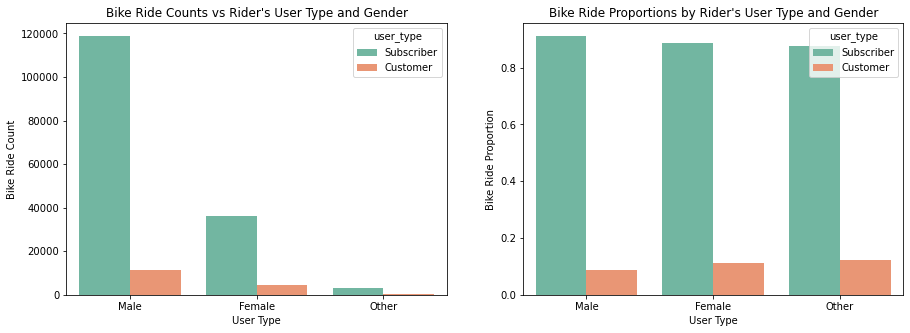

In [53]:
plt.figure(figsize = [15, 5])


plt.subplot(1, 2, 1)
sb.countplot(data = df_1940, x = 'member_gender', hue = 'user_type', palette= 'Set2')
plt.title("Bike Ride Counts vs Rider's User Type and Gender")
plt.xlabel("User Type")
plt.ylabel("Bike Ride Count")

plt.subplot(1,2,2)
sb.barplot(data = mg_usertype_prop1, x= 'member_gender', y ='count', hue = 'user_type', palette= 'Set2')
plt.title("Bike Ride Proportions by Rider's User Type and Gender")
plt.xlabel("User Type")
plt.ylabel("Bike Ride Proportion")

plt.show()

As established in the univariate section, that male riders (75%) were much more than the female (23%) and other gender (2%) riders.

Gender has very minimal effect on wheher a rider is likely to subscribe or not. Although we can see the proportions of male subcriptions being the highest followed by female and then other genders.

### Which gender is mostly enrolled in the bike share for all initiative?

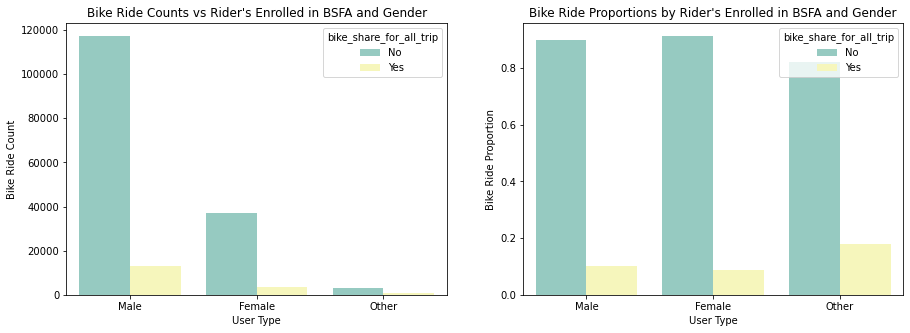

In [54]:
plt.figure(figsize = [15, 5])


plt.subplot(1, 2, 1)
sb.countplot(data = df_1940, x = 'member_gender', hue = 'bike_share_for_all_trip', palette= 'Set3')
plt.title("Bike Ride Counts vs Rider's Enrolled in BSFA and Gender")
plt.xlabel("User Type")
plt.ylabel("Bike Ride Count")

plt.subplot(1,2,2)
ax = sb.barplot(data = mg_bsfa_prop1, x= 'member_gender', y ='count', hue = 'bike_share_for_all_trip', palette= 'Set3')
plt.title("Bike Ride Proportions by Rider's Enrolled in BSFA and Gender")
plt.xlabel("User Type")
plt.ylabel("Bike Ride Proportion")

plt.show()

Female riders seem to have the highest number of enrollments in the bike share for all initiative in terms of proportion. Other genders have the least number of enrolments in the bike share for all intiative. Although the effect of gender is minimal

In [55]:
#saving updated dataframe to csv
rides1.to_csv('201902_fordgobike_tripdata_clean.csv', index = False)

## Conclusions
The main purpose of the analysis was to explore the various variables in a bike sharing dataset obtained in February 2019 from Ford GoBikes in San Franisco. Univariate, Bivariate and Multivariate visualisation were used for analysis. Below are the main findings from the analysis:
1. Adults aged 18-39 years utilised the bikes sharing service the most
2. The average ride duration in February 2019 is between 5-13 mins
3. Male riders (75%) made the majority of the riders
4. Most riders are subscribers (90.5%) to Ford GoBikes bike sharing 
5. Thursdays were the days were the highest number of bike rides was recorded.  Weekends recorded the lowest number of bike rides.
6. During the weekday, the most popular times for bike rides were 7-9 a.m. and 4-6 p.m.. During the weekends the  busiest period of bike rides were between 1-4 p.m.
7. The average duration of bike rides was lowest during the weekdays and highest during the weekend.
8. There is no correlation between the bike ride duration and the rider's birth year, as other factors may affect the ride duration
9. Men took the fastest average bike trips compared to other genders which took the slowest trips
10. Subscribers also had the fastest average bike trip duration compared to unregistered customers
11. The top 2 popular start and end bike stations are Market Street at 10 St and San Francisco Caltrain Station 2
12. The proportion of women riding bikes increase as the riders got younger. While that of other gender decreased as riders got younger
13. 70-79 year olds have the highest proportion of enrollments in the bike share for all initiaitive and  30-39 year olds had the lowest proportion of enrollments in bike share
14. Gender has minimal effect on subscription to the bike share while for the enrollment in the bike share for all initiative, females had the highest proportion of enrollment.